# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Linguagem Python e Power BI Para Manipulação de Dados</font>

## <font color='blue'>Mini-Projeto 3</font>
## <font color='blue'>Dashboard de Recursos Humanos Com Power BI e Linguagem Python</font>

![title](mini-projeto3.png)

## Definição do Problema

A empresa ZuZa Inc coletou dados do ano anterior com diversos atributos de funcionários de todos os setores. O objetivo é estudar a relação desses atributos e o impacto na promoção dos funcionários. Esse trabalho de análise pode ser usado mais tarde para construir modelos de Machine Learning para prever se um colaborador será ou não promovido.

Essas são as perguntas que devem ser respondidas:

- Pergunta 1 - Qual a Correlação Entre os Atributos dos Funcionários?
- Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?
- Pergunta 3 - Qual Avaliação do Ano Anterior Foi Mais Comum?
- Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?
- Pergunta 5 - Qual o Número de Treinamentos Mais Frequente?
- Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?
- Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?

Seu trabalho é limpar e preparar os dados e então construir um dashboard no Power BI para apresentar seus resultados.

## Carregando e Instalando Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

pandas    : 1.3.4
seaborn   : 0.11.2
numpy     : 1.20.3
matplotlib: 3.4.3



## Carregando os Dados

In [5]:
dadosRH = pd.read_csv('dadosRH.csv')

In [6]:
dadosRH.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [7]:
dadosRH.shape

(54808, 11)

## Análise Exploratória, Limpeza e Transformação de Dados

Vamos manipular os dados e corrigir eventuais problemas.

In [8]:
dadosRH.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [9]:
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


<AxesSubplot:xlabel='educacao', ylabel='count'>

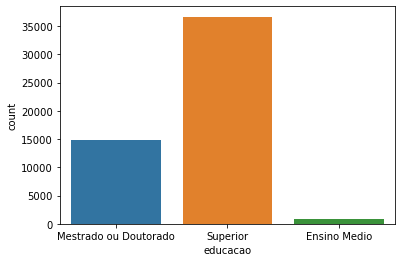

In [10]:
sns.countplot(dadosRH['educacao'])

In [11]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


<AxesSubplot:xlabel='aval_ano_anterior', ylabel='count'>

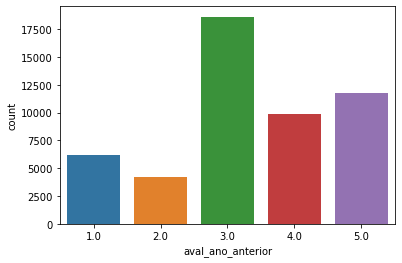

In [12]:
sns.countplot(dadosRH['aval_ano_anterior'])

Vamos aplicar imputação e preencher os valores ausentes.

In [13]:
dadosRH['educacao'].fillna(dadosRH['educacao'].mode()[0], inplace = True)

In [14]:
dadosRH['aval_ano_anterior'].fillna(dadosRH['aval_ano_anterior'].median(), inplace = True)

In [15]:
dadosRH.isnull().sum()

id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

In [16]:
dadosRH.shape

(54808, 11)

In [17]:
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,805,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
Superior,39078,39078,39078,39078,39078,39078,39078,39078,39078,39078


In [18]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4225,4225,4225,4225,4225,4225,4225
3.0,22742,22742,22742,22742,22742,22742,22742,22742,22742,22742
4.0,9877,9877,9877,9877,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11741,11741,11741,11741,11741,11741,11741


Vamos verificar o balanceamento de classe na variável "promovido".

In [19]:
dadosRH.groupby(['promovido']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


<AxesSubplot:xlabel='promovido', ylabel='count'>

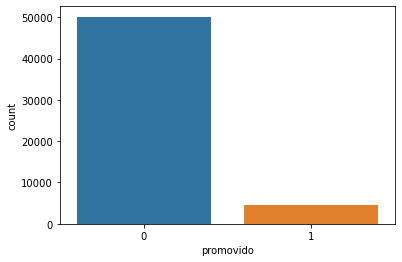

In [20]:
sns.countplot(dadosRH['promovido'])

In [21]:
df_classe_majoritaria = dadosRH[dadosRH.promovido==0]
df_classe_minoritaria = dadosRH[dadosRH.promovido==1]

In [22]:
df_classe_majoritaria.shape

(50140, 11)

In [23]:
df_classe_minoritaria.shape

(4668, 11)

In [24]:
# Upsample da classe minoritária
from sklearn.utils import resample
df_classe_minoritaria_upsampled = resample(df_classe_minoritaria, 
                                           replace = True,     
                                           n_samples = 50140,   
                                           random_state = 150) 

In [25]:
dadosRH_balanceados = pd.concat([df_classe_majoritaria, df_classe_minoritaria_upsampled])

In [26]:
dadosRH_balanceados.promovido.value_counts()

0    50140
1    50140
Name: promovido, dtype: int64

In [27]:
dadosRH_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


<AxesSubplot:xlabel='promovido', ylabel='count'>

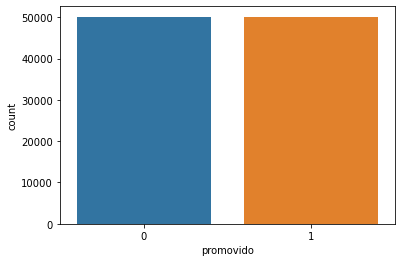

In [28]:
sns.countplot(dadosRH_balanceados['promovido'])

Os dados estão balanceados. Vamos salvar o dataset com os dados manipulados.

In [29]:
dadosRH_balanceados.to_csv('dadosRH_modificado.csv', encoding = 'utf-8', index = False)

Agora carregamos os dados e seguimos com o trabalho de análise.

> A partir daqui executaremos também no Power BI.

In [30]:
dataset = pd.read_csv('dadosRH_modificado.csv')
dataset.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [31]:
dataset.shape

(100280, 11)

### Pergunta 1 - Qual a Correlação Entre os Atributos dos Funcionários?

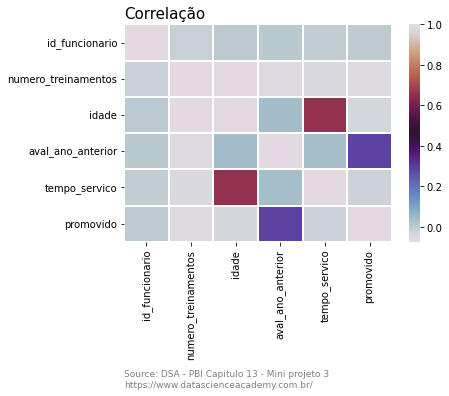

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = dataset.corr()
sns.heatmap(corr, cmap = "twilight", linewidths = 0.1)
plt.title('Correlação', fontsize = 15,x=0.0, y=1.0, ha='left')
src = 'Source: DSA - PBI Capitulo 13 - Mini projeto 3 \nhttps://www.datascienceacademy.com.br/'
plt.text(0., 10, src, fontsize = 9, alpha=0.5)
plt.show()

### Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?

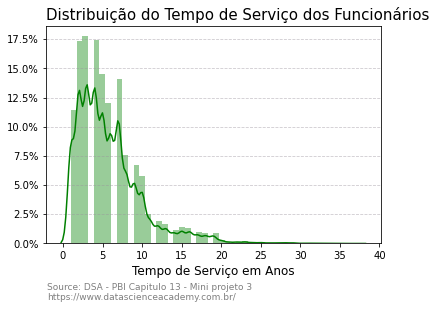

In [149]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
ax = sns.distplot(dataset['tempo_servico'], color = 'green')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set(ylabel=None)
ax.yaxis.grid(color='#9a929d', linestyle='dashed', alpha=0.5)
plt.title('Distribuição do Tempo de Serviço dos Funcionários', fontsize = 15,x=0.0, y=1.0, ha='left')
plt.xlabel('Tempo de Serviço em Anos', fontsize = 12)
src = 'Source: DSA - PBI Capitulo 13 - Mini projeto 3 \nhttps://www.datascienceacademy.com.br/'
plt.text(-2., -0.05, src, ha='left', va='bottom', fontsize = 9, alpha=0.5)
plt.show()

### Pergunta 3 - Qual Avaliação do Ano Anterior Foi Mais Comum?

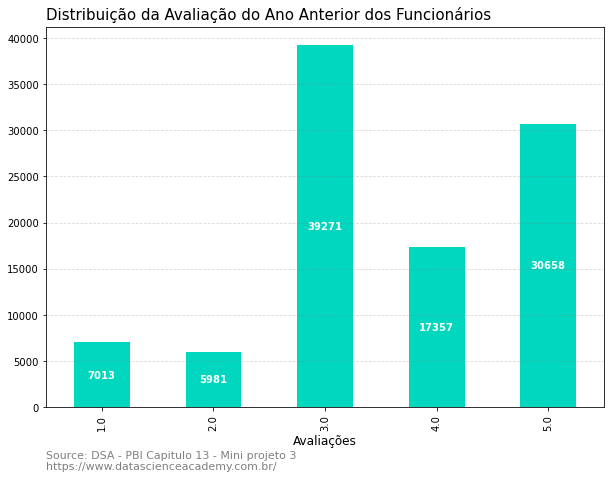

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = dataset['aval_ano_anterior'].value_counts().sort_index().plot.bar(color = '#00d7be', figsize = (10, 7))
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()/2.), ha='center', va='center', color='w',fontweight="bold")
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
plt.suptitle('Distribuição da Avaliação do Ano Anterior dos Funcionários', fontsize = 15, x=0.125, y=0.92, ha='left')
plt.xlabel('Avaliações', fontsize = 12)
src = 'Source: DSA - PBI Capitulo 13 - Mini projeto 3 \nhttps://www.datascienceacademy.com.br/'
plt.text(-0.5, -7000, src, ha='left', va='bottom', fontsize = 11, alpha=0.5)
plt.show()

### Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?

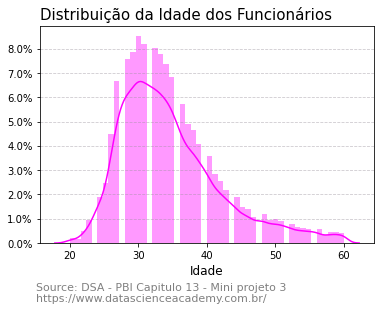

In [180]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
ax = sns.distplot(dataset['idade'], color = 'magenta')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set(ylabel=None)
ax.yaxis.grid(color='#9a929d', linestyle='dashed', alpha=0.5)
plt.title('Distribuição da Idade dos Funcionários', fontsize = 15, x=0.0, y=1.0, ha='left')
plt.xlabel('Idade', fontsize = 12)
src = 'Source: DSA - PBI Capitulo 13 - Mini projeto 3 \nhttps://www.datascienceacademy.com.br/'
plt.text(15, -0.025, src, ha='left', va='bottom', fontsize = 11, alpha=0.5)
plt.show()

### Pergunta 5 - Qual o Número de Treinamentos Mais Frequente?

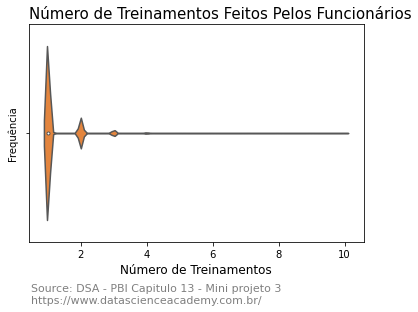

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(dataset['numero_treinamentos'], color = '#ff8122')
plt.title('Número de Treinamentos Feitos Pelos Funcionários', fontsize = 15, x=0.0, y=1.0, ha='left')
plt.xlabel('Número de Treinamentos', fontsize = 12)
plt.ylabel('Frequência')
src = 'Source: DSA - PBI Capitulo 13 - Mini projeto 3 \nhttps://www.datascienceacademy.com.br/'
plt.text(0.5, 0.79, src, ha='left', va='bottom', fontsize = 11, alpha=0.5)
plt.show()

### Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?

In [37]:
dataset['canal_recrutamento'].value_counts()

Outro          55375
Outsourcing    42358
Indicado        2547
Name: canal_recrutamento, dtype: int64

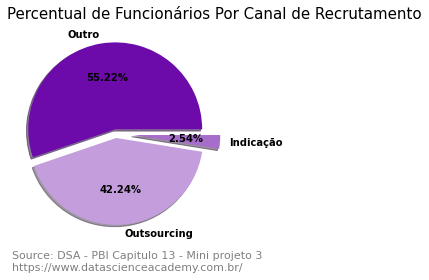

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset['canal_recrutamento'].value_counts()
fatias = [55375, 42358, 2547]
labels = "Outro", "Outsourcing", "Indicação"
colors = ['#6c0ba9', '#c49ddd', '#a76dcb']
explode = [0.05, 0.05, 0.2]
plt.pie(fatias, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%", textprops= {'color':"black", 'fontweight':'bold'})
plt.title('Percentual de Funcionários Por Canal de Recrutamento', fontsize = 15,x=0.0, y=1.0, ha='left')
plt.axis('off')
src = 'Source: DSA - PBI Capitulo 13 - Mini projeto 3 \nhttps://www.datascienceacademy.com.br/'
plt.text(-1.2, -1.6, src, ha='left', va='bottom', fontsize = 11, alpha=0.5)
plt.show()

### Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?

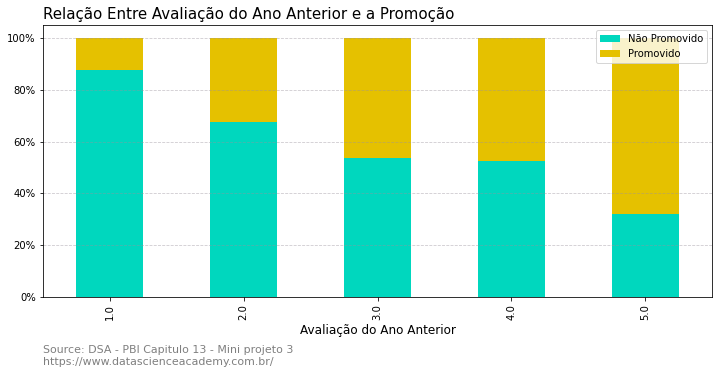

In [181]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido'])
ax = data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (12, 5), 
                                                   color = ['#00d7be', '#e5c100'])
ax.legend(['Não Promovido', 'Promovido'])
ax.yaxis.grid(color='#9a929d', linestyle='dashed', alpha=0.5)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.title('Relação Entre Avaliação do Ano Anterior e a Promoção', fontsize = 15, ha='left',x=0.0, y=1.0)
plt.xlabel('Avaliação do Ano Anterior', fontsize = 12)
src = 'Source: DSA - PBI Capitulo 13 - Mini projeto 3 \nhttps://www.datascienceacademy.com.br/'
plt.text(-0.5, -0.27, src, ha='left', va='bottom', fontsize = 11, alpha=0.5)
plt.show()

# Fim